# Extracting NDVI Values & Splitting Data 🤗

# Install libraries

In [ ]:
pip install h5py numpy matplotlib seaborn pyhdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.3/780.3 kB 29.9 MB/s eta 0:00:00


Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pyhdf.SD
import numpy as np
import os

# Set the path to the folder with HDF files
folder_path = '/content/drive/MyDrive/HDF Processing SEC ACC'
save_path = '/content/drive/MyDrive/HDF Processing SEC ACC/1'

# List the HDF files in the folder
hdf_files = [f for f in os.listdir(folder_path) if f.endswith('.hdf')]

# Split each HDF file into chunks
for hdf_file_name in hdf_files:
    # Load the HDF file
    hdf_file = pyhdf.SD.SD(os.path.join(folder_path, hdf_file_name))

    # Extract the NDVI Only From the HDF File dataset
    ndvi_dataset = hdf_file.select('250m 16 days NDVI')

    # Get the NDVI data
    ndvi_data = ndvi_dataset.get()

    # Split the NDVI data into chunks
    chunk_size = 500
    chunks = []
    for i in range(0, ndvi_data.shape[0], chunk_size):
        for j in range(0, ndvi_data.shape[1], chunk_size):
            chunk = ndvi_data[i:i+chunk_size, j:j+chunk_size]
            chunk = np.where(chunk == -3000, np.nan, chunk)
            chunk = chunk / 10000
            chunks.append(chunk)

    # Save each chunk as a separate file
    for i, chunk in enumerate(chunks):
        if not np.all(np.isnan(chunk)) and not np.all(chunk == 0):
            np.save(os.path.join(save_path, f'{hdf_file_name}_{i}.npy'), chunk)

Chunk 0: Shape=(500, 500), Min=-0.19, Max=0.99
Chunk 1: Shape=(500, 500), Min=-0.20, Max=1.00
Chunk 2: Shape=(500, 500), Min=-0.20, Max=1.00
Chunk 3: Shape=(500, 500), Min=-0.20, Max=1.00
Chunk 4: Shape=(500, 500), Min=-0.20, Max=1.00


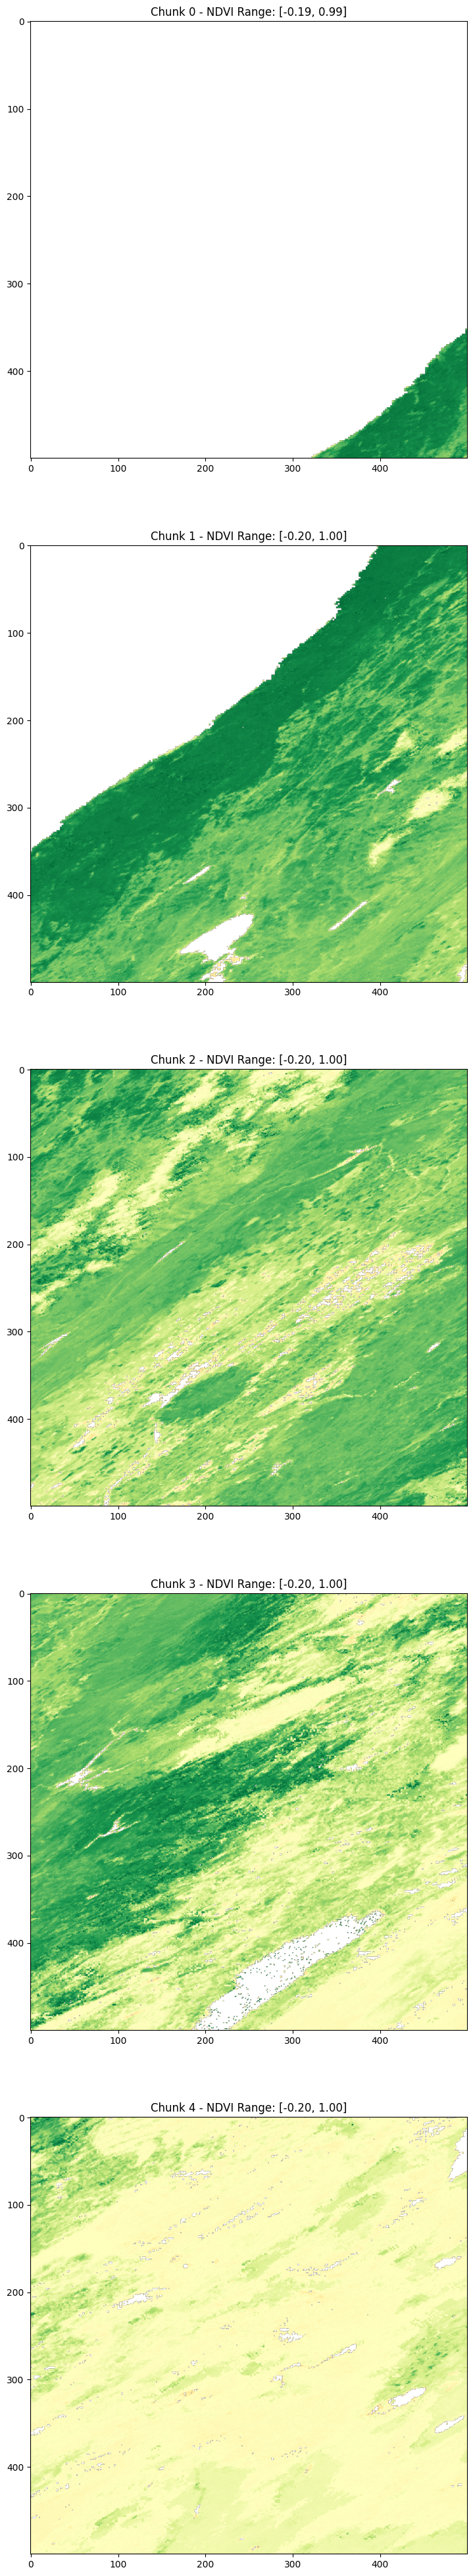

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the folder with .npy files
folder_path = '/content/drive/MyDrive/HDF Processing SEC ACC/1'

# List the .npy files in the folder
npy_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

# Load the .npy files
chunks = []
for npy_file in npy_files:
    chunk = np.load(os.path.join(folder_path, npy_file))
    chunks.append(chunk)

# Print a summary of the first 5 .npy files
for i in range(5):
    print(f"Chunk {i}: Shape={chunks[i].shape}, Min={np.nanmin(chunks[i]):.2f}, Max={np.nanmax(chunks[i]):.2f}")

# Visualize the first 5 chunks
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 10*5))
for i, chunk in enumerate(chunks[:5]):
    axs[i].imshow(chunk, cmap='RdYlGn', vmin=-1, vmax=1)
    axs[i].set_title(f'Chunk {i} - NDVI Range: [{np.nanmin(chunk):.2f}, {np.nanmax(chunk):.2f}]')
plt.show()